In a car making company and you would like to develop a model to predict the total amount required to make a car that depend on the following attributes:

- Manufacturer
- Model
- Engine_size
- Horsepower
- Wheelbase
- Width
- Length
- Curb_weight
- Fuel_capacity
- Fuel_efficiency
- Power_perf_factor


The model shoud predict
- Price_in_thousands

# Step 1 : Import library

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 : Load dataset file

In [61]:
dataset = pd.read_csv("/content/Car_sales.csv")
dataset.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# Step 3 : Visualize the dataset

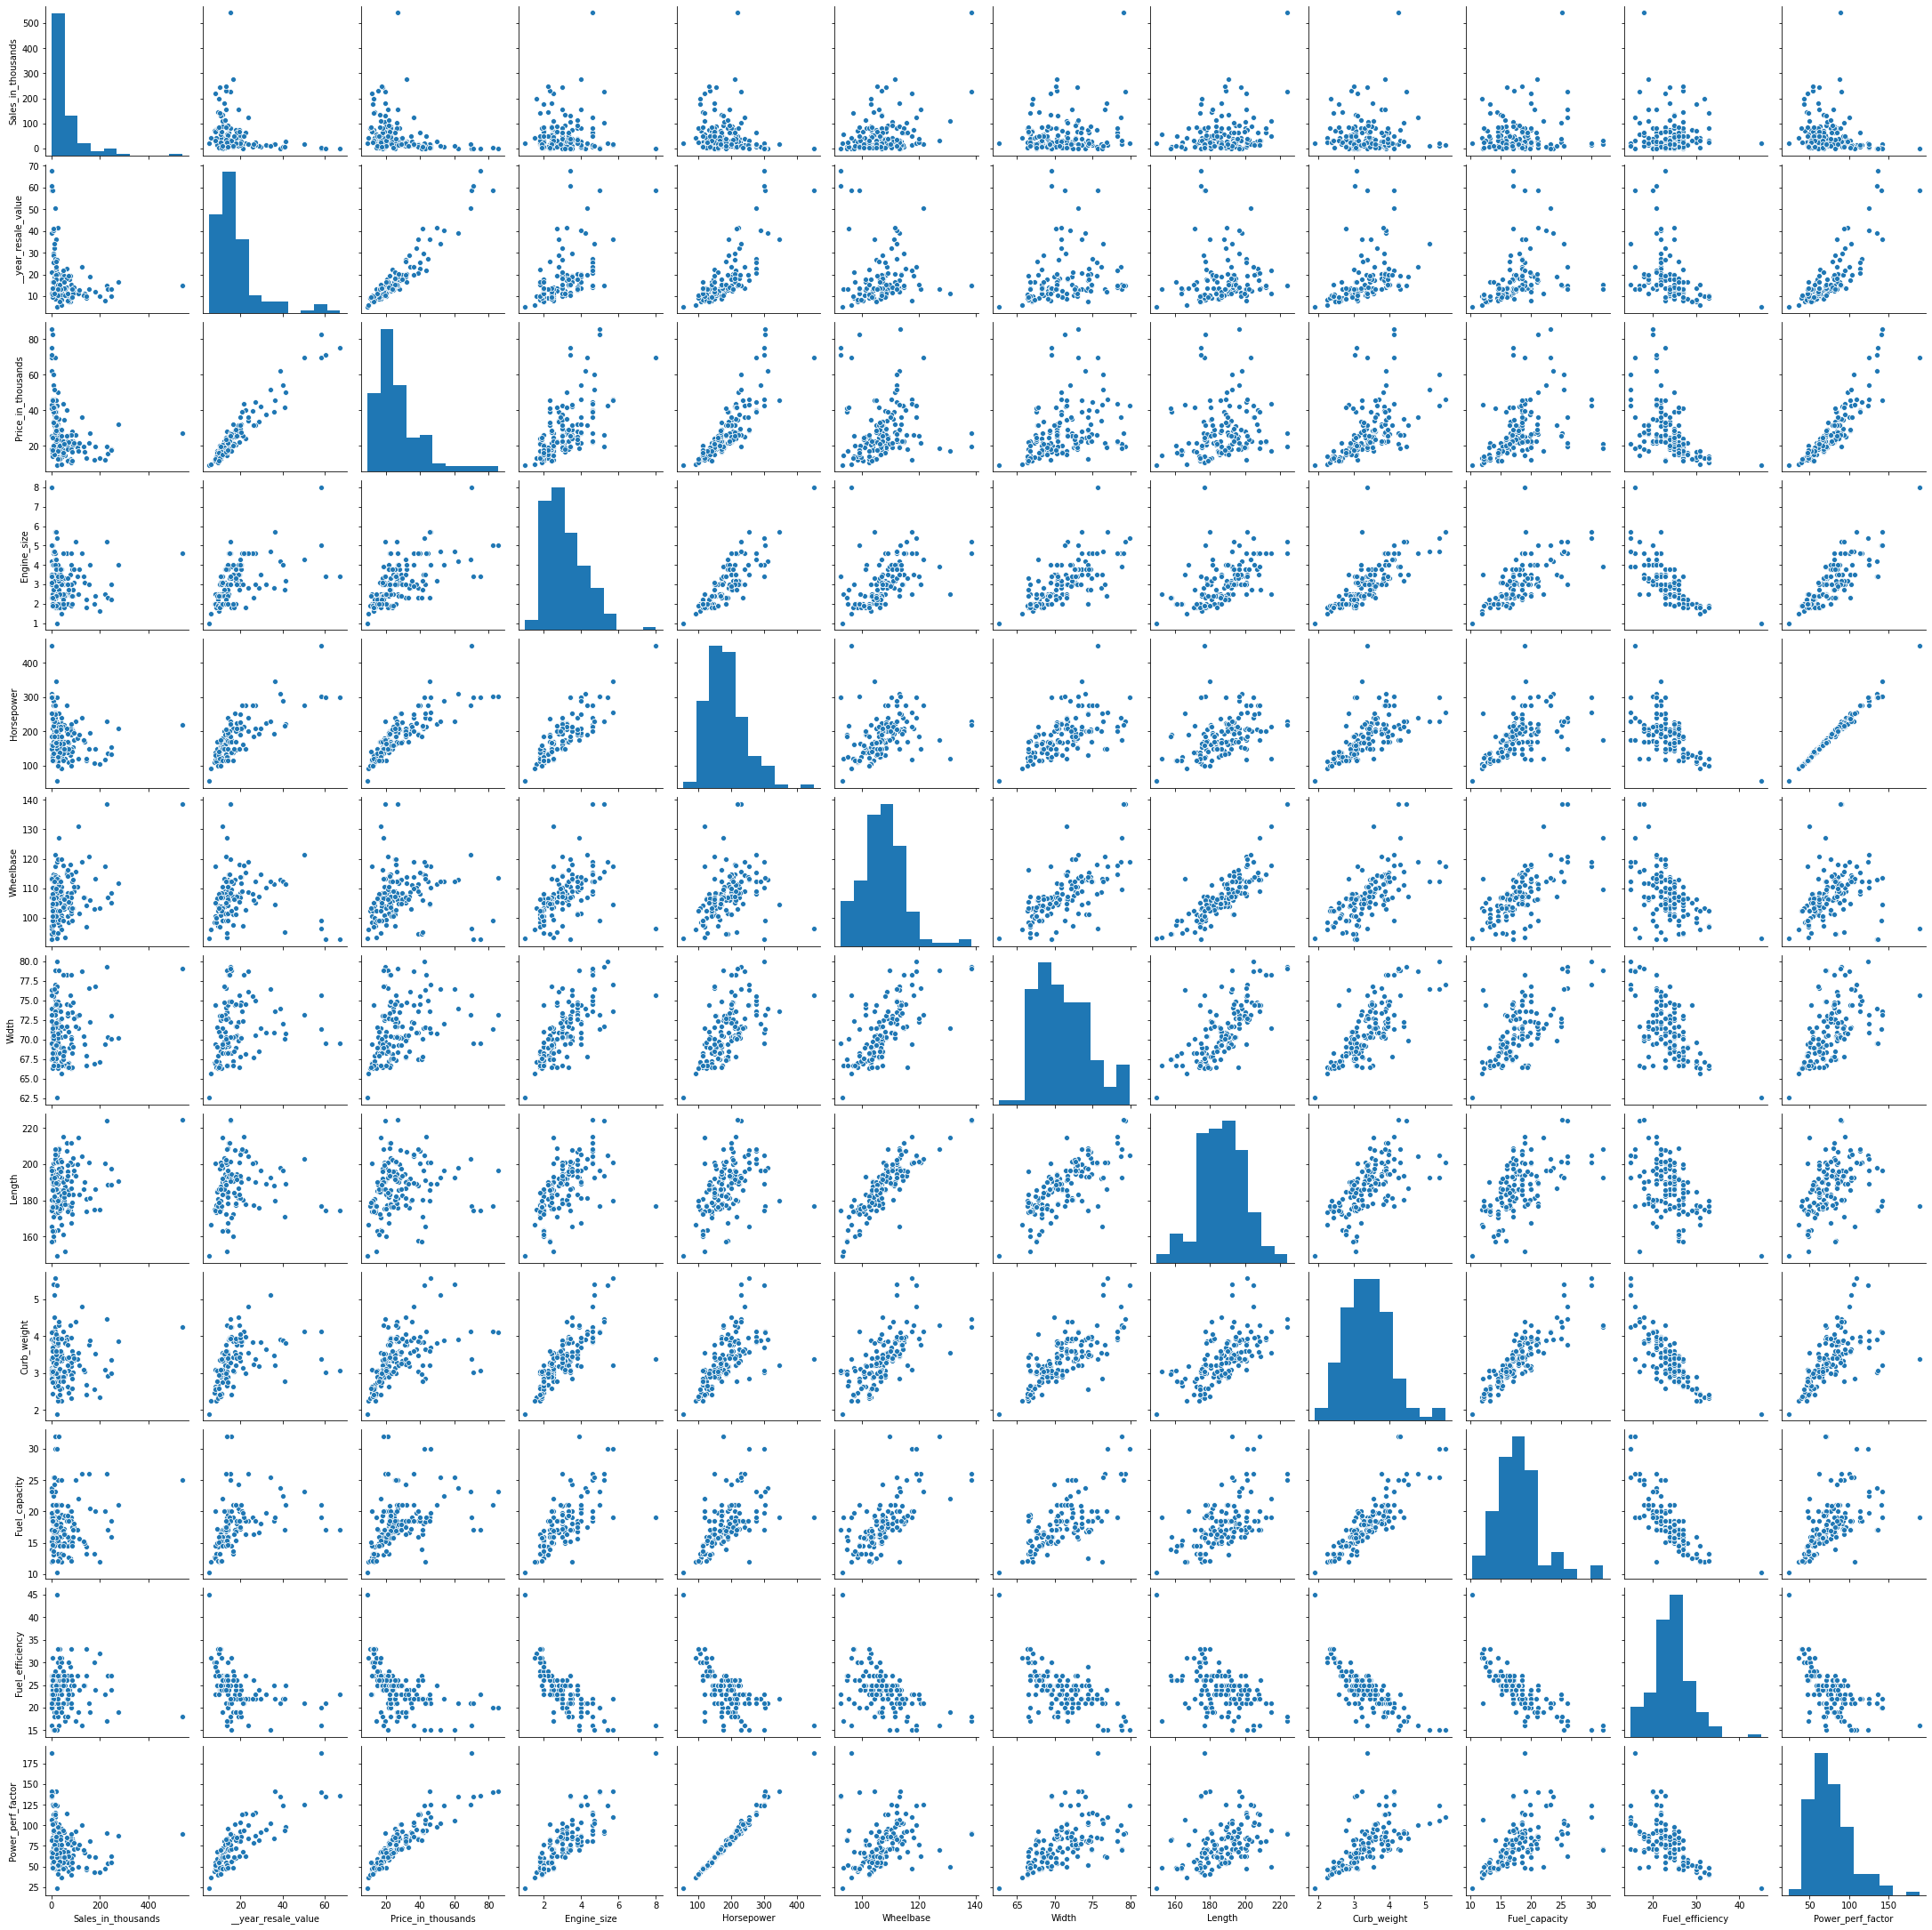

In [62]:
sns.pairplot(dataset)

# Step 4 : Seprate the useful data

In [63]:
dataset = dataset.drop(['Manufacturer','Model', 'Latest_Launch'], axis = 1)

In [64]:
dataset

,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


# Step 5 : Cleaning the data

In [65]:
X = dataset.iloc[:,4:].values
Y = dataset.iloc[:,3].values

# changing dimension of Y into 1D to 2D
Y = Y.reshape(-1,1)

# Step 6 : Replace Nan values with mean values

In [66]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(X)
X = imputer.transform(X)

imputer_y = imputer.fit(Y)
Y = imputer_y.transform(Y)

# Step 7 : Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X = scale.fit_transform(X)


In [68]:
scale.data_max_

array([  8.      , 450.      , 138.7     ,  79.9     , 224.5     ,
         5.572   ,  32.      ,  45.      , 188.144323])

In [69]:
scale.data_min_

array([  1.        ,  55.        ,  92.6       ,  62.6       ,
       149.4       ,   1.895     ,  10.3       ,  15.        ,
        23.27627233])

In [70]:
print(X)

[[0.11428571 0.21518987 0.18655098 ... 0.13364055 0.43333333 0.2123145 ]
 [0.31428571 0.43037975 0.3362256  ... 0.31797235 0.33333333 0.41302426]
 [0.31428571 0.43037975 0.31019523 ... 0.31797235 0.36666667 0.32612334]
 ...
 [0.2        0.28607595 0.26681128 ... 0.35023041 0.33333333 0.29041227]
 [0.18571429 0.45822785 0.26681128 ... 0.37788018 0.26666667 0.47521084]
 [0.27142857 0.36962025 0.37527115 ... 0.49769585 0.3        0.37884467]]


In [71]:
Y = scale.fit_transform(Y)
print(Y)

[[0.16082082]
 [0.25129483]
 [0.23806143]
 [0.4296204 ]
 [0.19347014]
 [0.3240674 ]
 [0.6918639 ]
 [0.23280666]
 [0.3168557 ]
 [0.38897266]
 [0.16704911]
 [0.21064709]
 [0.29803973]
 [0.24454206]
 [0.40201927]
 [0.46207303]
 [0.39900347]
 [0.2855176 ]
 [0.48501934]
 [0.0527765 ]
 [0.09571887]
 [0.12659805]
 [0.13315413]
 [0.1980594 ]
 [0.47820101]
 [0.06195503]
 [0.        ]
 [0.12659805]
 [0.13905461]
 [0.20009179]
 [0.17058939]
 [0.09499771]
 [0.2505081 ]
 [0.23806143]
 [0.26158788]
 [0.04464695]
 [0.12863043]
 [0.14416836]
 [0.17399856]
 [0.79315544]
 [0.13407199]
 [0.15839507]
 [0.12246771]
 [0.10155379]
 [0.22389038]
 [0.13544876]
 [0.03717302]
 [0.16160755]
 [0.10227496]
 [0.11342031]
 [0.0403855 ]
 [0.16993378]
 [0.2975808 ]
 [0.15964073]
 [0.3527175 ]
 [0.03691077]
 [0.23208549]
 [0.04785944]
 [0.08018095]
 [0.14836426]
 [0.22769291]
 [0.21982561]
 [0.00608405]
 [0.03361962]
 [0.07557857]
 [0.26525929]
 [0.44011014]
 [0.06851111]
 [0.16239428]
 [0.231561  ]
 [0.29200813]
 [0.37

# Step 8 : Creating the training and testing dataset

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

# Step 9 : Train the model

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(40,input_dim=9, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                400       
_________________________________________________________________
dense_11 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [74]:
# for calculate r2 value
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_square])

In [75]:
epochs_hist = model.fit(X_train, Y_train, epochs=60, batch_size=40,  verbose=1, validation_split=0.2)

Train on 93 samples, validate on 24 samples
Epoch 1/60
93/93 [==============================] - 0s 1ms/step - loss: 0.0467 - r_square: -0.5512 - val_loss: 0.0487 - val_r_square: 0.1330
Epoch 2/60
93/93 [==============================] - 0s 123us/step - loss: 0.0304 - r_square: 0.0819 - val_loss: 0.0342 - val_r_square: 0.3902
Epoch 3/60
93/93 [==============================] - 0s 96us/step - loss: 0.0230 - r_square: 0.1468 - val_loss: 0.0277 - val_r_square: 0.5064
Epoch 4/60
93/93 [==============================] - 0s 107us/step - loss: 0.0218 - r_square: 0.1488 - val_loss: 0.0252 - val_r_square: 0.5514
Epoch 5/60
93/93 [==============================] - 0s 90us/step - loss: 0.0220 - r_square: 0.1111 - val_loss: 0.0230 - val_r_square: 0.5909
Epoch 6/60
93/93 [==============================] - 0s 110us/step - loss: 0.0201 - r_square: 0.3413 - val_loss: 0.0208 - val_r_square: 0.6287
Epoch 7/60
93/93 [==============================] - 0s 93us/step - loss: 0.0173 - r_square: 0.4479 - val_lo

# Step 10 : Evaluating the dataset

In [76]:
print(epochs_hist.history.keys())

dict_keys(['val_loss', 'val_r_square', 'loss', 'r_square'])


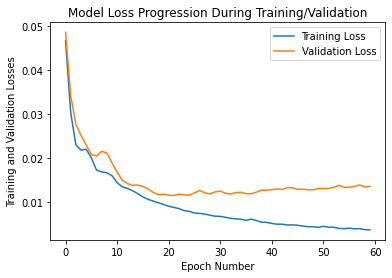

In [77]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [78]:
# Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency ,Power_perf_factor
# normalize data
X_test_sample = np.array([[0.2857, 0.29113,  0.26899, 0.42774, 0.407, 0.518, 0.21659, 0.3333, 0.344055]])
#Actual data
#X_test_sample = np.array([[3, 170,  105, 70, 180, 3.8, 15, 25, 80]])

y_predict_sample = model.predict(X_test_sample)
print('Expected Car Price in normalize form =', y_predict_sample)
y_predict_sample_orig = scale.inverse_transform(y_predict_sample)
print('Expected Car Price in thousands =', y_predict_sample_orig)

Expected Car Price in normalize form = [[0.2491681]]
Expected Car Price in thousands = [[28.237804]]
